# Model training using XGBoost

In [177]:
import joblib
# Load them back
data = joblib.load("resampled_data.joblib")
X_train_res = data["X_train_res"]
y_train_res = data["y_train_res"]
X_test = data["X_test"]
y_test = data["y_test"] 

print("✅ Resampled data loaded successfully")

✅ Resampled data loaded successfully


In [179]:
classes, counts = np.unique(y_train, return_counts= True)
print(dict(zip(classes, counts)))

{0.0: 11, 1.0: 346, 2.0: 2043}


It finds unique class labels in y_train and counts how many times each appears.

This means in your y_train dataset:

- Class 0.0 appears 11 times (very few samples)

- Class 1.0 appears 346 times

- Class 2.0 appears 2043 times

Your dataset is highly imbalanced, with class 2.0 dominating and 0.0 being rare, which can cause bias in the model.

In [182]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    max_depth=2,
    n_estimators=500,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    reg_alpha=3,
    reg_lambda=3,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

xgb_model.fit(
    X_train_res, y_train_res,
    verbose=True
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_class=3, ...)

- max_depth=2 → Shallow trees to reduce overfitting.

- n_estimators=500 → Builds up to 500 boosting trees.

- learning_rate=0.03 → Small learning rate for gradual learning.

- subsample=0.8 → Uses 80% of training samples per tree (adds randomness).

- colsample_bytree=0.8 → Uses 80% of features per tree.

- min_child_weight=5 → Minimum sum of instance weights (controls overfitting).

- reg_alpha=3 → L1 regularization (sparsity penalty).

- reg_lambda=3 → L2 regularization (ridge penalty).

- objective='multi:softmax' → Multi-class classification; outputs class labels directly.

- num_class=3 → There are 3 target classes.

- random_state=42 → Ensures reproducibility.

X_train_res, y_train_res → Your training features and labels (likely resampled to fix imbalance).

verbose=True → Prints progress/logs while training.

In short:
This builds an XGBoost classifier with regularization, resampled balanced data, and multi-class support (3 classes) to prevent overfitting while ensuring stable predictions.

The code outputs a fully trained gradient boosting classifier that predicts which of the 3 classes a new observation belongs to, optimized using 500 boosting rounds and regularization to reduce overfitting.

Train Balanced Accuracy: 0.9838472834067549
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2043
         1.0       0.96      0.99      0.98      2043
         2.0       1.00      0.96      0.98      2043

    accuracy                           0.98      6129
   macro avg       0.98      0.98      0.98      6129
weighted avg       0.98      0.98      0.98      6129

Confusion Matrix:
 [[2042    1    0]
 [  12 2028    3]
 [   0   83 1960]]


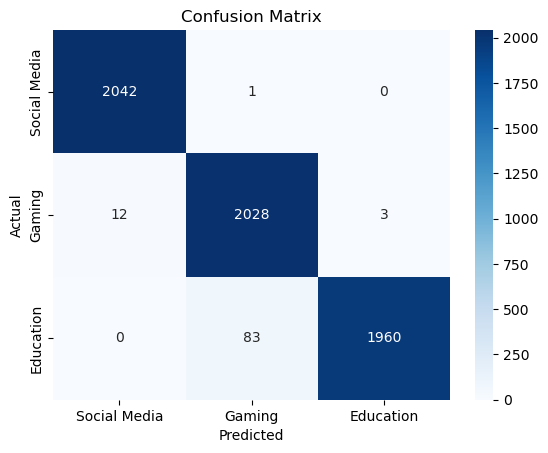

In [184]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix

pred_tr = xgb_model.predict(X_train_res)

print("Train Balanced Accuracy:", balanced_accuracy_score(y_train_res, pred_tr))
print("Classification Report:\n", classification_report(y_train_res, pred_tr))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, pred_tr))

sns.heatmap(confusion_matrix(y_train_res, pred_tr), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

This code predicts the training labels with your XGBoost model and evaluates performance:

- balanced_accuracy_score → overall accuracy accounting for class imbalance.

- classification_report → precision, recall, f1-score, and support per class.

- confusion_matrix → shows actual vs predicted counts for each class.

It tells you how well your model fits the training data.

1️⃣ Balanced Accuracy: 0.984

Very high, meaning the model predicts all classes almost equally well, even if the classes are imbalanced.

2️⃣ Classification Report:

Precision → Of all predicted as a class, how many were correct.

- Class 0: 0.99 → almost all predictions correct.

- Class 1: 0.96 → slightly lower.

- Class 2: 1.00 → perfect precision.

Recall → Of all actual instances of a class, how many were correctly predicted.

- Class 0: 1.00 → almost perfect recall.

- Class 1: 0.99 → very high.

- Class 2: 0.96 → a bit lower.

F1-score → balance of precision & recall. High for all classes (~0.98).

Support → number of samples per class (all 2043).

3️⃣ Confusion Matrix:

Rows → actual class, columns → predicted class.

Test Balanced Accuracy: 0.9577891048104492
Classification Report:
               precision    recall  f1-score   support

         0.0       0.43      1.00      0.60         3
         1.0       0.70      0.94      0.80        86
         2.0       1.00      0.93      0.96       511

    accuracy                           0.93       600
   macro avg       0.71      0.96      0.79       600
weighted avg       0.95      0.93      0.94       600

Confusion Matrix:
 [[  3   0   0]
 [  4  81   1]
 [  0  35 476]]


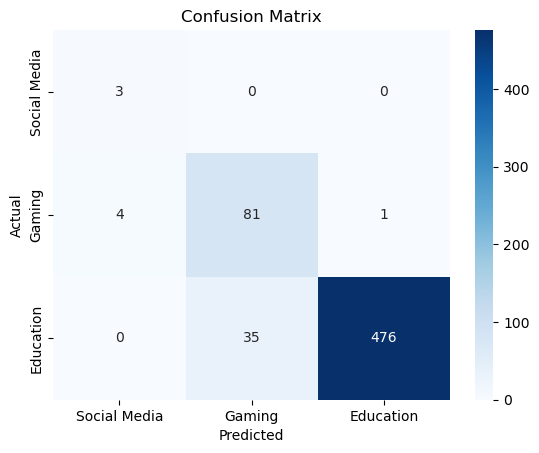

In [186]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix

y_pred = xgb_model.predict(X_test)

print("Test Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1️⃣ Balanced Accuracy: 0.958

Very high overall, meaning the model is fairly good at predicting all classes despite class imbalance.

2️⃣ Classification Report:

Precision: Correctness of predictions per class.

- Class 0: 0.43 → low precision because very few samples exist, so any misprediction heavily affects it.

- Class 1: 0.70 → moderate precision.

- Class 2: 1.00 → perfect precision.

Recall: Ability to capture all actual instances.

- Class 0: 1.00 → all 3 actual samples correctly predicted.

- Class 1: 0.94 → most samples correctly captured.

- Class 2: 0.93 → most samples correctly captured.

F1-score: Balance of precision & recall.

- Class 0: 0.60 → low due to poor precision.

- Class 1: 0.80 → decent.

- Class 2: 0.96 → very high.

3️⃣ Confusion Matrix:

Rows → actual class, columns → predicted class.

Class 0: all 3 correctly predicted   
Class 1: 81 correct, 4 misclassified as 0, 1 as 2   
Class 2: 476 correct, 35 misclassified as    

✅ Key Observations:

- Class 0 has very few samples (support=3), so metrics like precision/F1 are unstable.

- Most errors come from Class 2 predicted as 1 (35 samples).

- Model generalizes well overall (balanced accuracy ~0.96), but rare classes are sensitive due to low representation.

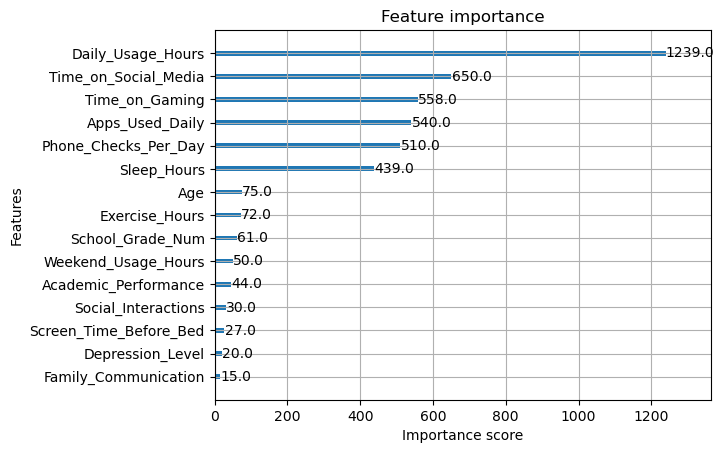

In [188]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model, max_num_features=15, importance_type='weight')
plt.show()

plot_importance(xgb_model, ...)

- Plots the importance of features in your trained XGBoost model (xgb_model).

- max_num_features=15 → shows the top 15 most important features.

- importance_type='weight' → importance is measured by the number of times a feature is used to split nodes across all trees.

plt.show()

- Displays the plot using Matplotlib.

Output Explanation

The output is a bar chart:

- Y-axis: Feature names.

- X-axis: Importance value (number of splits).

- Bars: Longer bars → feature is used more frequently in decision splits → more important for the model.

Interpretation:

- Features at the top of the chart are the most influential in predicting your target variable.

- You can use this to select top features and reduce dimensionality or improve interpretability.

In [194]:
# 1️⃣ Get feature importances from your trained XGBoost model
importance_df = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 2️⃣ Optional: plot cumulative importance to decide threshold
importance_df['Cumulative'] = importance_df['Importance'].cumsum()
print(importance_df)

# 3️⃣ Select features contributing to, e.g., 95% of total importance
selected_features = importance_df[importance_df['Cumulative'] <= 0.95]['Feature'].tolist()
print("Selected features:", selected_features)

# 4️⃣ Reduce train and test sets to selected features
X_train_reduced = X_train_res[selected_features].copy()
X_test_reduced = X_test[selected_features].copy()

                   Feature  Importance  Cumulative
0        Daily_Usage_Hours    0.274348    0.274348
1          Apps_Used_Daily    0.147705    0.422053
2     Phone_Checks_Per_Day    0.097273    0.519326
3           Time_on_Gaming    0.086659    0.605985
4     Time_on_Social_Media    0.084200    0.690185
5              Sleep_Hours    0.071350    0.761535
12                     Age    0.037569    0.799104
6      Weekend_Usage_Hours    0.035502    0.834606
8           Exercise_Hours    0.029447    0.864053
7     Academic_Performance    0.023556    0.887609
10        Depression_Level    0.018182    0.905791
13             Self_Esteem    0.017186    0.922977
17        School_Grade_Num    0.015954    0.938931
11  Screen_Time_Before_Bed    0.015673    0.954604
14    Family_Communication    0.014247    0.968851
15     Social_Interactions    0.012131    0.980983
9        Time_on_Education    0.010413    0.991396
16           Anxiety_Level    0.008604    1.000000
Selected features: ['Daily_Usag

- Creates a DataFrame listing each feature and its importance from the trained XGBoost model.

- xgb_model.feature_importances_ gives the relative importance of each feature.

- sort_values(..., ascending=False) sorts features from most to least important.

- Adds a cumulative sum column, showing the total importance captured as you go down the list of features.

- Helps decide which features contribute most to the model’s predictive power.

- Picks features up to 95% of cumulative importance.

- Reduces dimensionality by removing features that contribute very little to the model.

- Creates new training and testing datasets containing only the selected important features.

- These reduced datasets can now be used to retrain the model, often reducing overfitting.

✅ Purpose:

- Focus on the most important features.

- Reduce overfitting and improve model interpretability.

In [197]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_reduced, y_train_res)

This code uses SMOTE to balance your training data:

- smote.fit_resample(X_train_reduced, y_train_res) creates synthetic samples for minority classes.

- X_train_bal and y_train_bal are the balanced features and labels.

- After this, all classes have roughly the same number of samples, helping the model learn fairly.

In [200]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# =========================
# 2️⃣ XGBoost Hyperparameter Tuning
# =========================

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=1000,          # high, early stopping will cut
    learning_rate=0.01,         # low learning rate
    max_depth=2,                # shallow trees
    min_child_weight=5,
    subsample=0.7,              # row subsample
    colsample_bytree=0.7,       # feature subsample
    reg_alpha=5,
    reg_lambda=5,
    random_state=42,
)

param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
    'gamma': [0, 0.1, 0.2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='balanced_accuracy',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_bal, y_train_bal)

best_params = random_search.best_params_

# =========================
# 3️⃣ Train Final Model with Early Stopping (xgb.train)
# =========================

# Convert datasets to DMatrix
dtrain = xgb.DMatrix(X_train_bal, label=y_train_bal)
dtest  = xgb.DMatrix(X_test_reduced, label=y_test)

params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'subsample': best_params['subsample'],
    'colsample_bytree': best_params['colsample_bytree'],
    'reg_alpha': best_params['reg_alpha'],
    'reg_lambda': best_params['reg_lambda'],
    'gamma': best_params['gamma'],
    'eval_metric': 'mlogloss'
}

evals = [(dtrain, 'train'), (dtest, 'test')]

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=True
)

# =========================
# 4️⃣ Evaluation
# =========================

# Predict
y_pred_train = bst.predict(dtrain).argmax(axis=1)
y_pred_test  = bst.predict(dtest).argmax(axis=1)

print("Train Balanced Accuracy:", balanced_accuracy_score(y_train_bal, y_pred_train))
print("Train Classification Report:\n", classification_report(y_train_bal, y_pred_train))
print("Train Confusion Matrix:\n", confusion_matrix(y_train_bal, y_pred_train))

print("Test Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	train-mlogloss:1.01292	test-mlogloss:1.01542
[1]	train-mlogloss:0.94878	test-mlogloss:0.96259
[2]	train-mlogloss:0.87634	test-mlogloss:0.90578
[3]	train-mlogloss:0.80644	test-mlogloss:0.84382
[4]	train-mlogloss:0.74818	test-mlogloss:0.79875
[5]	train-mlogloss:0.70176	test-mlogloss:0.75176
[6]	train-mlogloss:0.65906	test-mlogloss:0.71294
[7]	train-mlogloss:0.62238	test-mlogloss:0.67444
[8]	train-mlogloss:0.59138	test-mlogloss:0.64795
[9]	train-mlogloss:0.56452	test-mlogloss:0.62405
[10]	train-mlogloss:0.52785	test-mlogloss:0.59227
[11]	train-mlogloss:0.49416	test-mlogloss:0.56219
[12]	train-mlogloss:0.46908	test-mlogloss:0.54191
[13]	train-mlogloss:0.44513	test-mlogloss:0.52240
[14]	train-mlogloss:0.42038	test-mlogloss:0.50070
[15]	train-mlogloss:0.40171	test-mlogloss:0.48060
[16]	train-mlogloss:0.38084	test-mlogloss:0.46154
[17]	train-mlogloss:0.36437	test-mlogloss:0.44514
[18]	train-mlogloss:0.34670	test-mlogloss:0.4291

Short Explanation:

1. Hyperparameter Tuning (RandomizedSearchCV)

- Tries 50 random combinations of XGBoost hyperparameters using 5-fold stratified CV.

- Optimizes for balanced accuracy on the SMOTE-balanced training data (X_train_bal, y_train_bal).

- Finds best_params for the final model.

2. Train Final Model (xgb.train)

- Converts train/test sets to DMatrix (XGBoost’s optimized format).

- Trains with best_params, multi-class softprob objective, and early stopping (stops if test loss doesn’t improve for 30 rounds).

3. Evaluation

- Predicts on train and test sets.

- Prints Balanced Accuracy, Classification Report (precision, recall, f1-score), and Confusion Matrix.

Output Interpretation:

- Shows how well the model performs on training vs test data.

- If training accuracy is very high (near 1.0) but test accuracy is lower, the model may still overfit.

- Confusion matrices show where misclassifications happen per class.

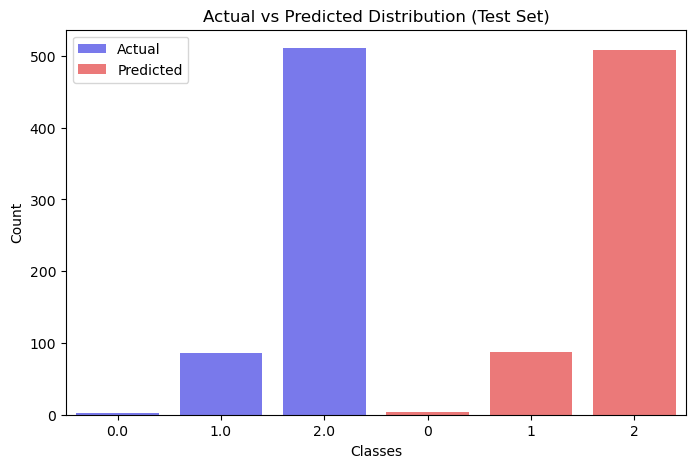

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine actual and predicted into a DataFrame
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

plt.figure(figsize=(8,5))
sns.countplot(x='Actual', data=df_results, alpha=0.6, color='blue', label='Actual')
sns.countplot(x='Predicted', data=df_results, alpha=0.6, color='red', label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Distribution (Test Set)")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

✅ Explanation:

- df_results holds actual and predicted labels.

- Two overlapping countplots:

    - Blue bars → actual class counts.
    
    - Red bars → predicted class counts.

- Visually shows which classes are over- or under-predicted.


 Training confusion matrix: 



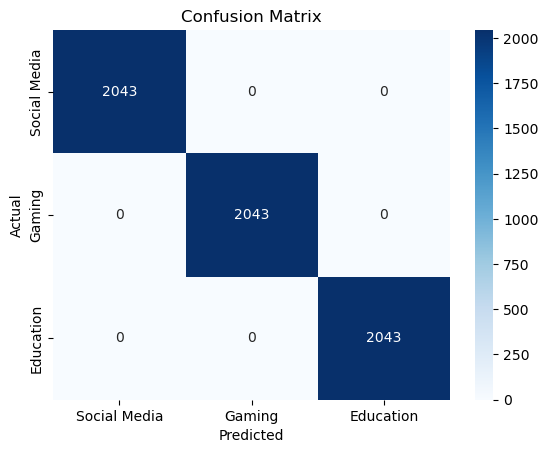


 Testing confusion matrix: 



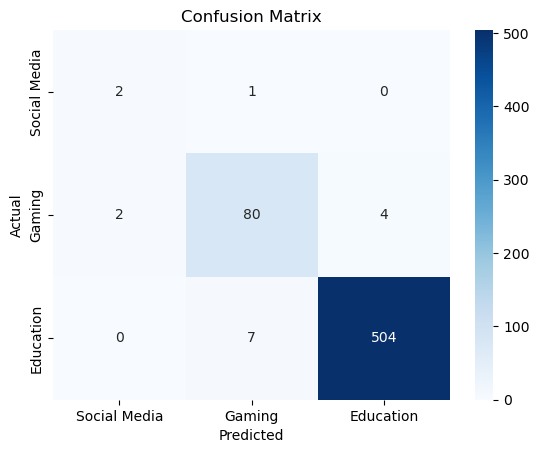

In [204]:
print("\n Training confusion matrix: \n")
sns.heatmap(confusion_matrix(y_train_bal, y_pred_train), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\n Testing confusion matrix: \n")
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

This code plots heatmaps of the confusion matrices for train and test data:

- Diagonal cells → correct predictions.

- Off-diagonal cells → misclassifications.

- Uses Seaborn heatmap with labels, colors, and annotations for easy visualization.

- Helps see model performance and which classes are confused.

In [206]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X_train_bal, y_train_bal, cv=cv, scoring='balanced_accuracy')
print("CV Balanced Accuracy:", scores.mean())

CV Balanced Accuracy: 0.9626396279783307


This code evaluates your model using cross-validation:

- StratifiedKFold splits data into 5 folds, keeping the class distribution roughly the same in each fold.

- cross_val_score trains and tests xgb_model on each fold and computes the balanced accuracy.

- scores.mean() gives the average balanced accuracy across all folds.

Output: a single number showing how well the model performs on unseen data, taking class imbalance into account.

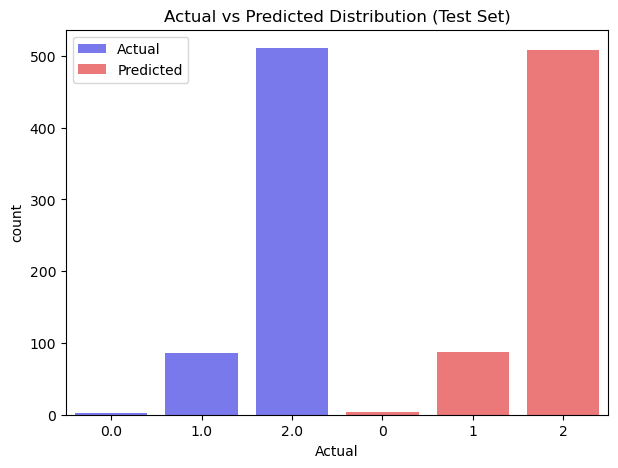

In [208]:
# Combine actual vs predicted
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

plt.figure(figsize=(7,5))
sns.countplot(x='Actual', data=df_results, alpha=0.6, color='blue', label='Actual')
sns.countplot(x='Predicted', data=df_results, alpha=0.6, color='red', label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Distribution (Test Set)")
plt.show()

This code visualizes the distribution of actual vs predicted labels on your test set.

- df_results combines the true labels (y_test) and your model's predictions (y_pred_test) into a DataFrame.

- plt.figure(figsize=(7,5)) sets the figure size.

- sns.countplot is used twice, once for actual labels (blue) and once for predicted labels (red), with alpha=0.6 to make overlapping bars semi-transparent.

- plt.legend() adds a legend for Actual vs Predicted.

- plt.title() sets the plot title.

- plt.show() displays the plot.

Output:
A bar chart showing how many samples belong to each class (0, 1, 2) in the test set vs how many your model predicted for each class. This helps visually check for misclassifications or class imbalance.